In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('save_total.csv')
df = wine.copy()

In [120]:
X=df.drop('quality',axis=1)
y=df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

In [121]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [122]:
knn.score(X_test,y_test)

0.5919117647058824

In [107]:
acc_test=[]
acc_train=[]
for i in range(1,100):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X_train, y_train)
    acc_test.append(knn_k.score(X_test, y_test))
    acc_train.append(knn_k.score(X_train, y_train))

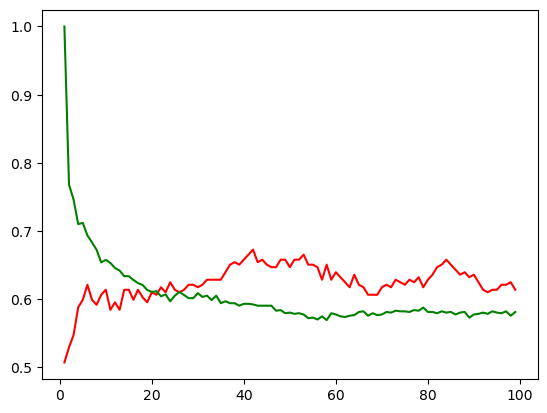

In [108]:
plt.plot(range(1,100), acc_test,'r')
plt.plot(range(1,100), acc_train, 'g')

In [124]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최적의 정확도 얻기
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 정확도: {best_accuracy:.2f}')


최적의 파라미터: {'n_neighbors': 8}
최적의 정확도: 0.58


In [126]:
from sklearn.metrics import f1_score

# 최적의 파라미터로 모델 초기화
best_k = best_params['n_neighbors']
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# 모델을 훈련 데이터에 맞춤
best_knn.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = best_knn.predict(X_test)

# F1 점수 계산
f1 = f1_score(y_test, y_pred, average='weighted')  # 또는 'binary'로 설정 가능

best_k = best_params['n_neighbors']
print(f'최적의 k 값: {best_k}')

print(f'최적 모델의 F1 점수: {f1:.2f}')


최적의 k 값: 8
최적 모델의 F1 점수: 0.57


In [24]:
gb_pred = gb_grid_cv.best_estimator_.predict(test_X)
gb_accuracy = accuracy_score(test_y,gb_pred)
print('GBM 정확도: {0:.4f}'.format(gv_accuracy))

gb_grid_cv_roc_score = roc_auc_score(test_y,gb_grid_cv.predict_prova(test_X)[:,1],average='macro')
print('GBM ROC AUC: {0:.4f}'.format(gb_grid_cv_roc_score))

NameError: name 'gb_grid_cv' is not defined

In [109]:
# 맨하탄 거리를 사용하는 KNeighborsClassifier 생성
knn_manhattan = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

# 테스트 세트에서의 정확도 계산
accuracy = knn_manhattan.score(X_test, y_test)
print("Accuracy with Manhattan distance:", accuracy)


Accuracy with Manhattan distance: 0.6139705882352942


In [110]:
acc_test=[]
acc_train=[]
for i in range(1,100):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X_train, y_train)
    acc_test.append(knn_k.score(X_test, y_test))
    acc_train.append(knn_k.score(X_train, y_train))

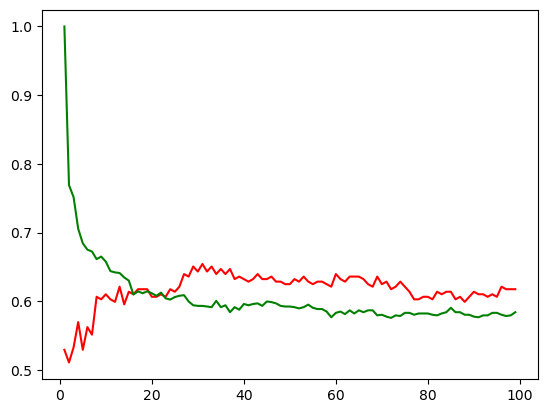

In [111]:
plt.plot(range(1,100), acc_test,'r')
plt.plot(range(1,100), acc_train, 'g')

-------------------------------------------------------------

In [ ]:
# 선택한 독립변수들로 구성된 DataFrame 생성
X1 = df[['alcohol', 'sulphates', 'volatile acidity', 'chlorides', 'pH', 'total sulfur dioxide']]

# 종속변수
y = df['quality']
